In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import cv2

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/shenzhen_tubeculosis/shenzhen_metadata.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   study_id  662 non-null    object
 1   sex       662 non-null    object
 2   age       662 non-null    int64 
 3   findings  662 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.8+ KB


In [10]:
df.head(7)

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal
5,CHNCXR_0006_0.png,Male,60,normal
6,CHNCXR_0007_0.png,Female,53,normal


In [11]:
df.tail(7)

,study_id,sex,age,findings
655,CHNCXR_0656_1.png,Male,35,secondary PTB in the right upper field
656,CHNCXR_0657_1.png,Male,31,Right secondary PTB in the upper and middle fi...
657,CHNCXR_0658_1.png,Male,41,bilateral secondary PTB with right pneumothorax
658,CHNCXR_0659_1.png,Male,33,secondary PTB in the left upper field
659,CHNCXR_0660_1.png,Male,50,1.bilateral secondary PTB with right upper at...
660,CHNCXR_0661_1.png,Male,26,bilateral secondary PTB with right pleural th...
661,CHNCXR_0662_1.png,Male,32,secondary PTB in the right upper field


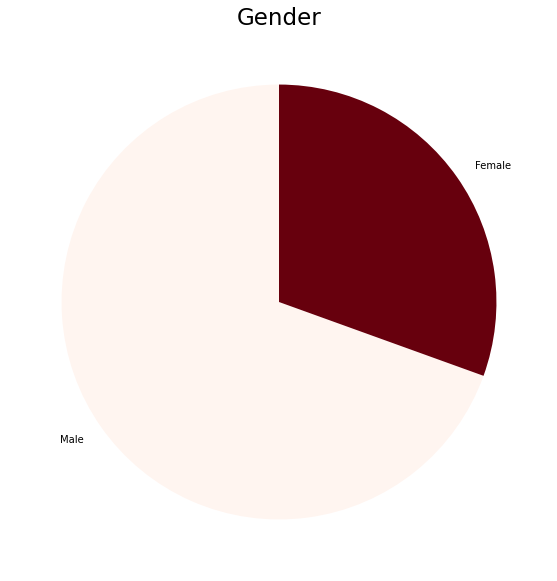

In [12]:
color = plt.cm.Reds(np.linspace(0, 1, 2))
df['sex'].value_counts().plot.pie(colors=color,
                                  figsize=(10, 10),
                                  startangle=90)
plt.title('Gender', fontsize=23)
plt.axis('off')
plt.show()

In [13]:
df['findings'].value_counts()

normal                                                                 326
bilateral PTB                                                           61
Right PTB                                                               45
PTB in the right upper field                                            27
left PTB                                                                19
                                                                      ... 
bilateral acute hematogenous disseminated PTB                            1
secondary PTB  in the left lower field                                   1
Right secondary PTB                                                      1
Right pneumothorax, Right upper PTB, bilateral widespread infection      1
left upper PTB, left pleurisy                                            1
Name: findings, Length: 75, dtype: int64

In [14]:
def extract_target(x):
    target = int(x[-5])
    if target == 0:
        return 'Normal'
    if target == 1:
        return 'Tuberculosis'

In [15]:
df['target'] = df['study_id'].apply(extract_target)

In [16]:
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories)))
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) 
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['study_id']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=14)  
    plt.tight_layout()
    plt.show()

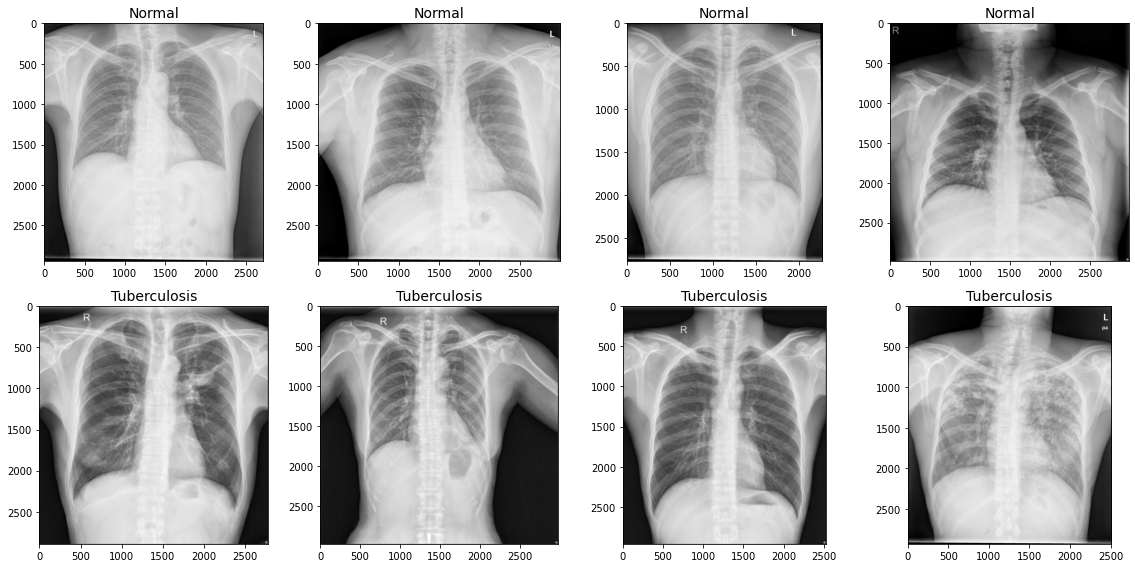

In [17]:
IMAGE_PATH = '/content/gdrive/MyDrive/shenzhen_tubeculosis/images/images/' 
draw_category_images('target',4, df, IMAGE_PATH)